<a href="https://colab.research.google.com/github/Robinkim0125/DataAnalysis/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TextMining

한글 설정 코딩

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [2]:
import pandas as pd
df = pd.read_table('news_data.csv' , sep = ',')
df

,news,code
0,[파주=파이낸셜뉴스 강근주 기자] 파주시는 4일 관내 취약계층 1만9379가구에 대...,사회
1,이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의 산소 공급 호스가...,사회
2,[의정부=파이낸셜뉴스 강근주 기자] 황범순 의정부시 부시장은 4일 시공 중인 을지대...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회
...,...,...
595,(지디넷코리아=이도원 기자)스마일게이트알피지(대표 지원길)는 블록버스터 핵앤슬래시 ...,IT/과학
596,(서울=뉴스1) 송화연 기자 = 공유버스 플랫폼 모두의셔틀은 신종 코로나바이러스 감...,IT/과학
597,휴온스의 신종 코로나바이러스 감염증(코로나19) 관련 방역용품이 미국 수출길에 오른...,IT/과학
598,http://news.kbs.co.kr/news/list.do?icd=19588\n...,IT/과학


In [3]:
df.isnull() # 빈행이 있는가?

,news,code
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
595,False,False
596,False,False
597,False,False
598,False,False


**데이터 테이블 정리**

In [4]:
print(df.isnull().sum())  #빈행이 몇개인가? 확인하기

news    0
code    0
dtype: int64


In [ ]:
df['news'].unique()

In [6]:
df['code'].unique() #중복제외하고 하나씩 존재하는 값 출력

array(['사회', '생활/문화', 'IT/과학'], dtype=object)

In [7]:
df['code'].nunique() #유니크 한 것의 개수?

3

In [8]:
df['news'].nunique() #중복된 값이 54개 있다.

546

In [9]:
df.drop_duplicates(subset=['news'], inplace = True) 
#중복된 데이터 삭제 
#inplace=True 로 인해 원본데이터 프레임에 중복 데이터 삭제
# 없으면 원본데이터에는 변함 없음 / 중복 삭제된 데이터를 다른곳에 저장은 가능

In [10]:
len(df)

546

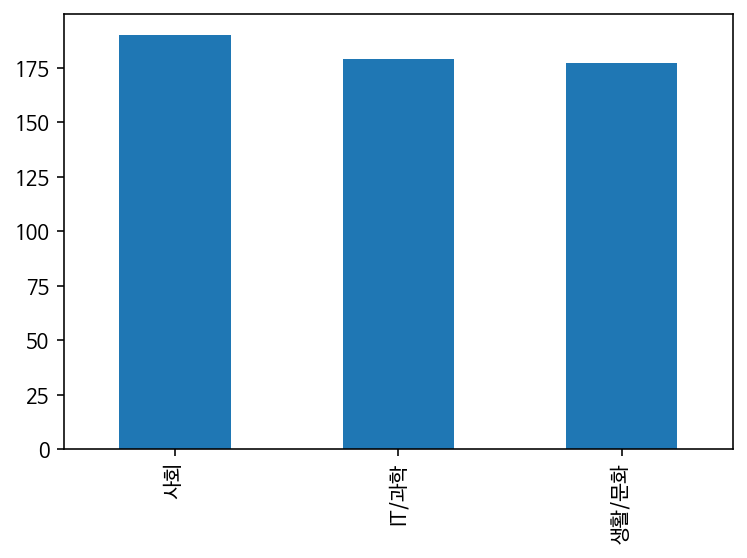

In [12]:
df['code'].value_counts().plot(kind ="bar")

# 형태소 분석

In [ ]:
!pip install konlpy

In [14]:
from konlpy.tag import Okt # 명사 분석기

In [15]:
tokenizer = Okt() #명사 분석기를 tokenizer라는 이름으로 이제 사용한다는 뜻

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

In [16]:
print(tokenizer.nouns(kor_text)) #명사만 뽑아내겠다

['밤', '귀가', '여성', '범죄', '시도', '남성', '구속', '서울', '경찰서', '상해', '혐의', '씨', '구속', '수사', '일', '씨', '지난달', '일', '피해', '여성', '인근', '지하철', '역', '폭행', '시도', '혐의', '피해', '여성', '저항', '놀란', '씨', '신고', '주변', '수색', '경찰', '체포', '피해', '여성', '이', '과정', '부상', '것']


In [21]:
# 데이터의 뉴스들의 토큰화 된 결과를 지속적으로 출력해보면서 지속적으로 추가한 단어들입니다.(불용어)
stop_words = ['기자', '제공', '무단', '배포', '무단배포', '배포금지', '이번', '위해', '라며', '금지', '뉴스', '통해', '오늘', '지난달', '지난', '대한', '경우', '관련', '뉴시스', '현재', '지난해', '때문', '지금', '또한', '만큼', '최근', '당시', '올해', '대해', '다시', '모두']

In [17]:
df['tokenized'] = df['news'].apply(tokenizer.nouns)

In [18]:
df

,news,code,tokenized
0,[파주=파이낸셜뉴스 강근주 기자] 파주시는 4일 관내 취약계층 1만9379가구에 대...,사회,"[파주, 파이낸셜뉴스, 강, 주, 기자, 파주시, 관내, 취약, 계층, 가구, 대해..."
1,이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의 산소 공급 호스가...,사회,"[이천, 물류, 창고, 화재, 발화, 지점, 지목, 지하, 층, 산소, 절, 단기,..."
2,[의정부=파이낸셜뉴스 강근주 기자] 황범순 의정부시 부시장은 4일 시공 중인 을지대...,사회,"[의정부, 파이낸셜뉴스, 강, 주, 기자, 황범, 순, 의정부시, 부시장, 시공, ..."
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회,"[갓길, 여성, 성범죄, 시도, 남성, 구속, 서울, 강남, 경찰서, 강간, 상해,..."
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회,"[서울, 연합뉴스, 사회, 코로나바이러스, 감염증, 대응, 체계, 사회, 거리, 두..."
...,...,...,...
595,(지디넷코리아=이도원 기자)스마일게이트알피지(대표 지원길)는 블록버스터 핵앤슬래시 ...,IT/과학,"[넷, 코리아, 이도, 기자, 스마일게이트, 알피, 대표, 지원, 길, 블록버스터,..."
596,(서울=뉴스1) 송화연 기자 = 공유버스 플랫폼 모두의셔틀은 신종 코로나바이러스 감...,IT/과학,"[서울, 뉴스, 송화, 연, 기자, 공유, 버스, 플랫폼, 모두, 셔틀, 신종, 코..."
597,휴온스의 신종 코로나바이러스 감염증(코로나19) 관련 방역용품이 미국 수출길에 오른...,IT/과학,"[온스, 신종, 코로나바이러스, 감염증, 코로나, 관련, 방역, 용품, 미국, 수출..."
598,http://news.kbs.co.kr/news/list.do?icd=19588\n...,IT/과학,"[코로나, 치료, 제, 백신, 개발, 범, 정부, 원단, 오늘, 부터, 이틀, 동안..."


리스트 컴프리핸션 연산 예시

In [19]:
test_list = ['경찰서', '상해', '혐의', '씨', '구속', '수사', '일']
remove_word_list = ['경찰서', '구속']
test_list = [item for item in test_list if item not in remove_word_list and len(item) > 1]

print(test_list)

['상해', '혐의', '수사']


In [22]:
#lambda x : ==> 하나의 행을 x 라고 지칭하겠다.
df['tokenized'] = df['tokenized'].apply(lambda x: [item for item in x if item not in stop_words and len(item) > 1])

In [23]:
df

,news,code,tokenized
0,[파주=파이낸셜뉴스 강근주 기자] 파주시는 4일 관내 취약계층 1만9379가구에 대...,사회,"[파주, 파이낸셜뉴스, 파주시, 관내, 취약, 계층, 가구, 정부, 긴급, 재난, ..."
1,이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의 산소 공급 호스가...,사회,"[이천, 물류, 창고, 화재, 발화, 지점, 지목, 지하, 산소, 단기, 산소, 공..."
2,[의정부=파이낸셜뉴스 강근주 기자] 황범순 의정부시 부시장은 4일 시공 중인 을지대...,사회,"[의정부, 파이낸셜뉴스, 황범, 의정부시, 부시장, 시공, 중인, 을지대, 학교, ..."
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회,"[갓길, 여성, 성범죄, 시도, 남성, 구속, 서울, 강남, 경찰서, 강간, 상해,..."
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회,"[서울, 연합뉴스, 사회, 코로나바이러스, 감염증, 대응, 체계, 사회, 거리, 두..."
...,...,...,...
595,(지디넷코리아=이도원 기자)스마일게이트알피지(대표 지원길)는 블록버스터 핵앤슬래시 ...,IT/과학,"[코리아, 이도, 스마일게이트, 알피, 대표, 지원, 블록버스터, 핵앤, 슬래시, ..."
596,(서울=뉴스1) 송화연 기자 = 공유버스 플랫폼 모두의셔틀은 신종 코로나바이러스 감...,IT/과학,"[서울, 송화, 공유, 버스, 플랫폼, 셔틀, 신종, 코로나바이러스, 감염증, 코로..."
597,휴온스의 신종 코로나바이러스 감염증(코로나19) 관련 방역용품이 미국 수출길에 오른...,IT/과학,"[온스, 신종, 코로나바이러스, 감염증, 코로나, 방역, 용품, 미국, 수출, 온스..."
598,http://news.kbs.co.kr/news/list.do?icd=19588\n...,IT/과학,"[코로나, 치료, 백신, 개발, 정부, 원단, 부터, 이틀, 동안, 기업, 대상, ..."


빈도수 분석

In [24]:
df[df['code']=='사회']

,news,code,tokenized
0,[파주=파이낸셜뉴스 강근주 기자] 파주시는 4일 관내 취약계층 1만9379가구에 대...,사회,"[파주, 파이낸셜뉴스, 파주시, 관내, 취약, 계층, 가구, 정부, 긴급, 재난, ..."
1,이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의 산소 공급 호스가...,사회,"[이천, 물류, 창고, 화재, 발화, 지점, 지목, 지하, 산소, 단기, 산소, 공..."
2,[의정부=파이낸셜뉴스 강근주 기자] 황범순 의정부시 부시장은 4일 시공 중인 을지대...,사회,"[의정부, 파이낸셜뉴스, 황범, 의정부시, 부시장, 시공, 중인, 을지대, 학교, ..."
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회,"[갓길, 여성, 성범죄, 시도, 남성, 구속, 서울, 강남, 경찰서, 강간, 상해,..."
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회,"[서울, 연합뉴스, 사회, 코로나바이러스, 감염증, 대응, 체계, 사회, 거리, 두..."
...,...,...,...
195,[KBS 청주]충북 도민에게 지급되는 재난 지원금이 전국 최저 수준인 것으로 나타났...,사회,"[청주, 충북, 도민, 지급, 재난, 원금, 전국, 최저, 수준, 충청북도, 전국,..."
196,"[KBS 청주][앵커]정부의 방역 지침이 '생활 속 거리 두기'로 완화된 첫날, 지...",사회,"[청주, 앵커, 정부, 방역, 지침, 생활, 거리, 두기, 완화, 첫날, 지역, 사..."
197,[KBS 청주][앵커]'생활 속' 거리 두기로 코로나 19 방역 수위가 완화되자마자...,사회,"[청주, 앵커, 생활, 거리, 두기, 코로나, 방역, 수위, 완화, 충북, 진자, ..."
198,"[앵커]이재용 삼성전자 부회장의 대국민 사과와는 별개로, 검찰 수사는 정점을 향해 ...",사회,"[앵커, 이재용, 삼성, 전자, 부회장, 대국민, 사과, 별개, 검찰, 수사, 정점..."


In [ ]:
df[df['code']=='사회']['tokenized'].values
 #하나의 리스트로 합쳐져서 출력됨
 #list여러개가 합쳐진 array 형태로 출력됨
 #리스트 안에 여러개 리스트를 하나의 리스트로 변환 np.hstack함수이용

In [29]:
import numpy as np

In [32]:
social_news = np.hstack(df[df['code']=='사회']['tokenized'].values)
life_news = np.hstack(df[df['code']=='생활/문화']['tokenized'].values)
IT_news = np.hstack(df[df['code']=='IT/과학']['tokenized'].values)

In [34]:
print(len(social_news))
print(len(life_news))
print(len(IT_news))

21196
27159
32642


In [36]:
from collections import Counter

In [38]:
social_news_count = Counter(social_news)
print(social_news_count.most_common(10))

[('코로나', 174), ('혐의', 142), ('학교', 126), ('경찰', 122), ('거리', 115), ('방역', 112), ('학생', 112), ('두기', 95), ('생활', 95), ('서울', 93)]


In [39]:
life_news_count = Counter(life_news)
print(life_news_count.most_common(10))

[('코로나', 243), ('한국', 193), ('판매', 153), ('관광', 139), ('기온', 124), ('서울', 116), ('국내', 90), ('문화', 86), ('내일', 83), ('지역', 80)]


In [40]:
IT_news_count = Counter(IT_news)
print(IT_news_count.most_common(10))

[('기업', 224), ('서비스', 196), ('방사', 188), ('사업', 186), ('코로나', 183), ('개발', 171), ('기술', 168), ('국내', 153), ('시장', 138), ('지역', 133)]
